# Models

## Model 1: Generalized growth models

Let $C : [0,T] \to [0, \infty)$ is the total confirmed COVID 19 cases at time $t$ and is given by

\begin{align}
C(t) = \left( \frac{r}{m}t + (C_0)^{1/m} \right)^m, \label{eq:model1} \tag{1}
\end{align}

where $m = 1/(1 - p)$ and $C_0 = C(0)$ is the initial condition. Special cases:

- When $p=0$, $C = C_0 + rt$

- When $p=1$, $C = C_0 \exp[rt]$


## Model 2: Initially increasing and then decreasing

Consider $C$ given by

\begin{align}
C(t) = at \exp[-bt^2]) + C_0, \label{eq:model2} \tag{2}
\end{align}

where $a\geq 0$ controls the slope of $C$ at origin while $b\geq 0$ controls the inflection point of $C$.


## Model 3

Consider $C$ given by

\begin{align}
C(t) = a \exp\left[b\left(1 - \frac{1}{1-(1-t/T)^p}\right)\right] + C_0, \label{eq:model3} \tag{3}
\end{align}

where $a,b$ are model parameters and $p>1$ is the fixed exponent. $T< \infty$ is the bound on time beyond which this model will fail to work. This is the limitation of this model. We can take $T$ same as final time at which we want model prediction.

# Plot models

## Model 1

In [1]:
# dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# sns.set_style("dark")
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=3, rc={"lines.linewidth": 4})
# mpl.rcParams['lines.linewidth'] = 3

In [2]:
# time vector
t = [float(i) for i in range(84)]
T = 100.
C_0 = 1.

# import models
from models import model1, model2, model3

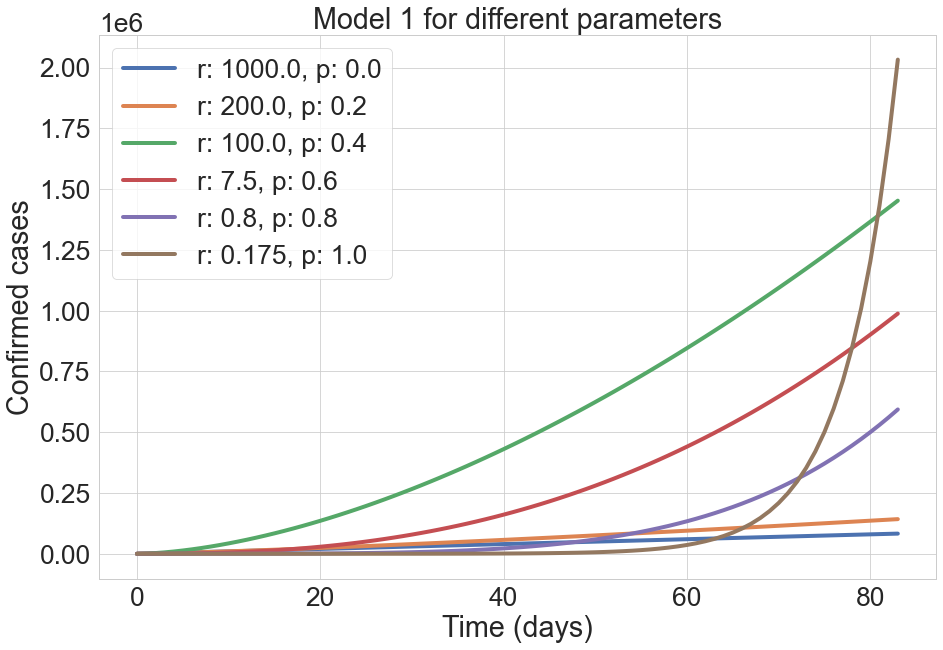

In [3]:
theta_1 = [1000., 200., 100., 7.5, 0.8, 0.175]
theta_2 = [0., 0.2, 0.4, 0.6, 0.8, 1.]

fig = plt.figure(figsize=(15., 10.))
for i in range(len(theta_1)):
    
    r = theta_1[i]
    p = theta_2[i]
    
    C = model1([r,p], t, [C_0, T])
    plt.plot(t, C, label='r: {}, p: {}'.format(r, p))
    
plt.title('Model 1 for different parameters')
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.legend()

## Model 2

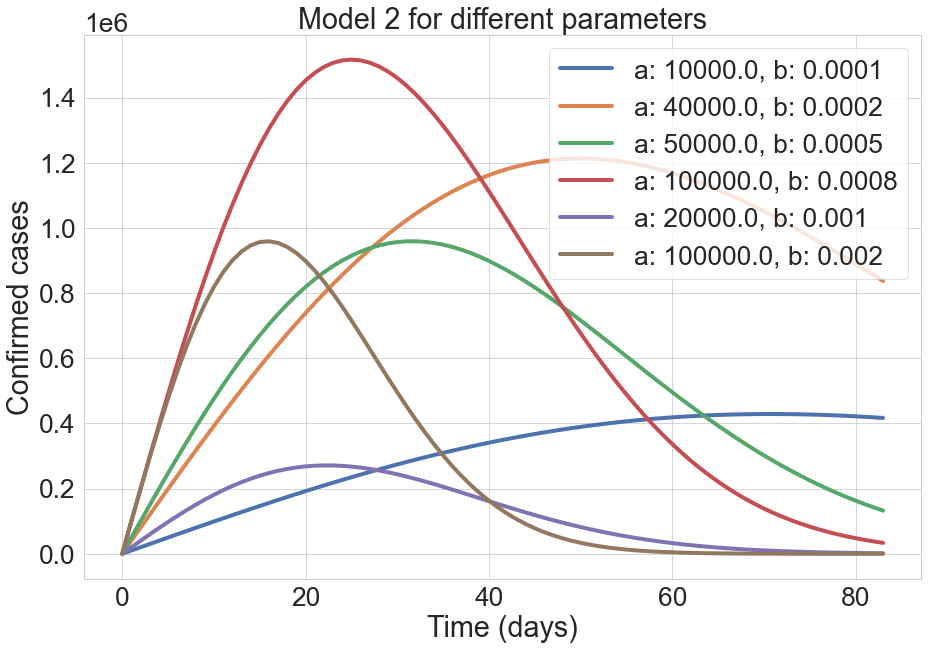

In [4]:
theta_3 = [10000., 40000., 50000., 100000., 20000., 100000.]
theta_4 = [0.0001, 0.0002, 0.0005, 0.0008, 0.001, 0.002]

fig = plt.figure(figsize=(15., 10.))
for i in range(len(theta_1)):
    
    a = theta_3[i]
    b = theta_4[i]
    
    C = model2([a,b], t, [C_0, T])
    plt.plot(t, C, label='a: {}, b: {}'.format(a, b))
    
plt.title('Model 2 for different parameters')
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.legend()

## Model 3

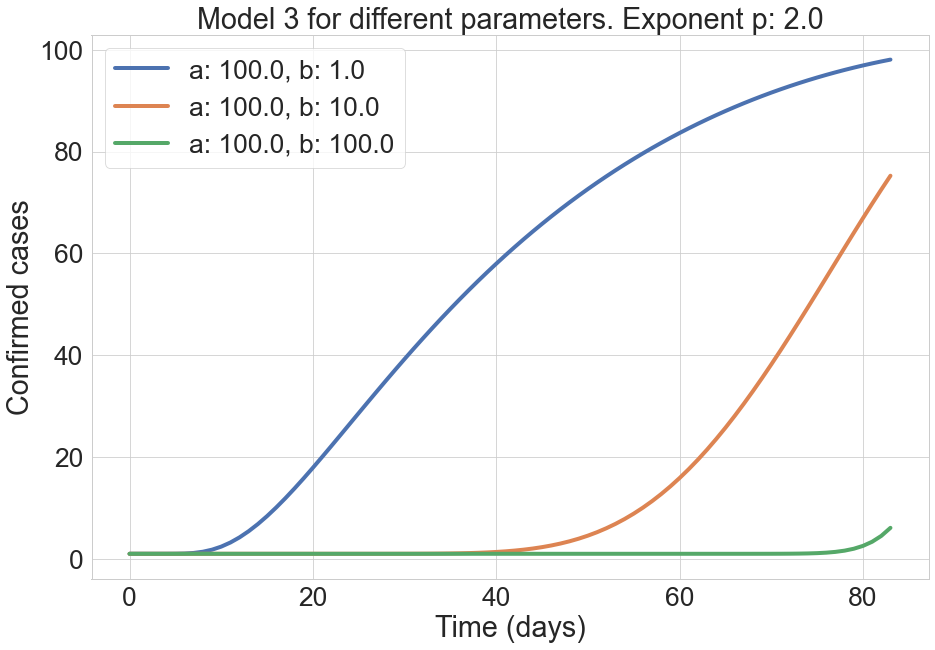

In [5]:
theta_5 = [100., 100., 100.]
theta_6 = [1., 10., 100.]

# when exponent is fixed to p = 2 in model 3
p = 2.
fig = plt.figure(figsize=(15., 10.))
for i in range(len(theta_5)):
    
    a = theta_5[i]
    b = theta_6[i]
    
    C = model3([a,b], t, [C_0, T, p])
    plt.plot(t, C, label='a: {}, b: {}'.format(a, b))
    
plt.title('Model 3 for different parameters. Exponent p: {}'.format(p))
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.legend()

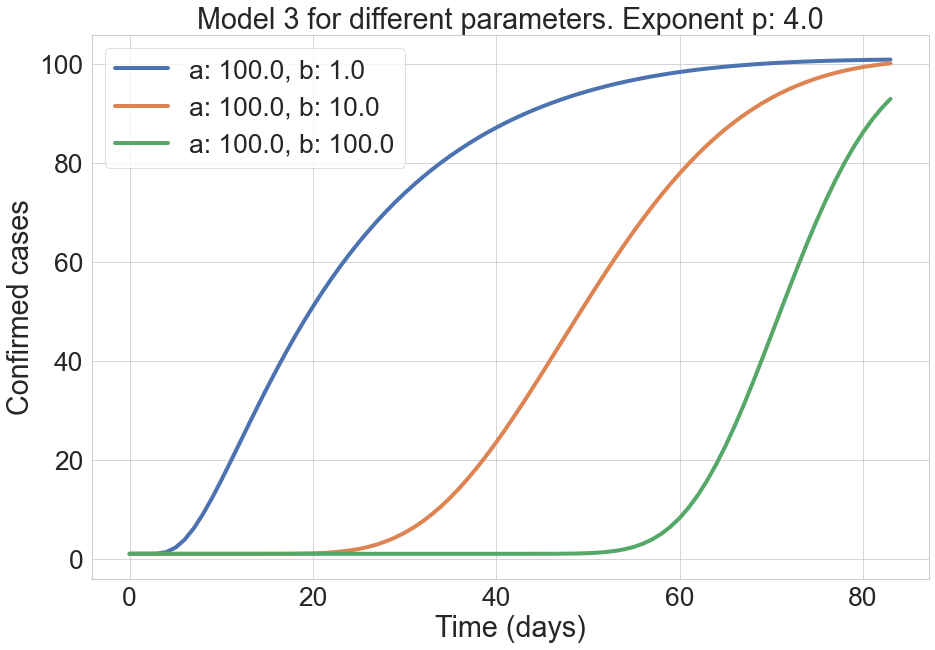

In [6]:
# when exponent is fixed to p = 4 in model 3
p = 4.

fig = plt.figure(figsize=(15., 10.))
for i in range(len(theta_5)):
    
    a = theta_5[i]
    b = theta_6[i]
    
    C = model3([a,b], t, [C_0, T, p])
    plt.plot(t, C, label='a: {}, b: {}'.format(a, b))
    
plt.title('Model 3 for different parameters. Exponent p: {}'.format(p))
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.legend()